In [162]:
import numpy as np 
import statsmodels.api as sm
import pandas as pd 
import matplotlib.pyplot as plt



In [187]:
fed_interest = pd.read_csv('FEDFUNDS.csv', index_col= 0)
euro_interst = pd.read_csv('INTDSREZM193N.csv', index_col = 0)


fed_interest.index = pd.to_datetime(fed_interest.index, format = "%Y-%m-%d")

fed_interest['FED FUNDS PCT CHANGE'] = fed_interest['FEDFUNDS'].pct_change()
fed_interest['Intercept'] = 1 

euro_interst['EURO PCT CHANGE'] = euro_interst['INTDSREZM193N'].pct_change()
euro_interst['Intercept'] = 1 

fed_interest

,FEDFUNDS,FED FUNDS PCT CHANGE,Intercept
DATE,,,
1999-01-01,4.63,NaN,1
1999-02-01,4.76,0.028078,1
1999-03-01,4.81,0.010504,1
1999-04-01,4.74,-0.014553,1
1999-05-01,4.74,0.000000,1
...,...,...,...
2017-01-01,0.65,0.203704,1
2017-02-01,0.66,0.015385,1
2017-03-01,0.79,0.196970,1


In [176]:
dependent = fed_interest.loc["1999-02-01": , ['FED FUNDS PCT CHANGE']].reset_index()
independent = fed_interest.loc["1999-01-01" : "2017-04-01", ['FEDFUNDS', 'Intercept']].reset_index()

dependent = dependent[['FED FUNDS PCT CHANGE']]
independent = independent[['FEDFUNDS', 'Intercept']]

In [161]:
results = sm.regression.linear_model.OLS(dependent, independent)
results = results.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     FED FUNDS PCT CHANGE   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.308
Date:                  Mon, 14 Oct 2024   Prob (F-statistic):              0.254
Time:                          23:12:02   Log-Likelihood:                 112.69
No. Observations:                   220   AIC:                            -221.4
Df Residuals:                       218   BIC:                            -214.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FEDFUNDS      -0.0053      0.005     -1.144      0.254      -0.014       0.004
Intercept      0.0139      0.013      1.039      0.300      -0.012       0.040
==============================================================================
Omnibus:                       81.054   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.068
Skew:                           0.918   Prob(JB):                    8.36e-293
Kurtosis:                      14.973   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

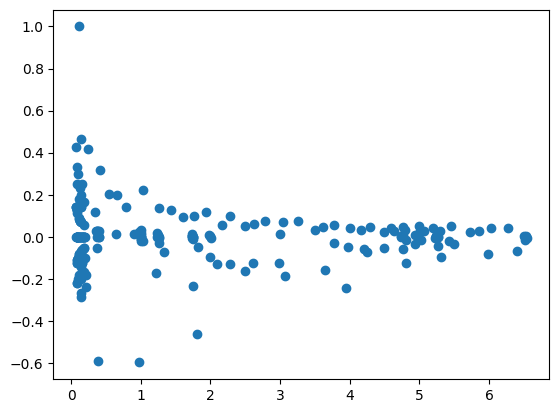

In [169]:
plt.scatter(independent['FEDFUNDS'], dependent)
plt.show()

In [ ]:
def Vasicek(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0, prices=True):
    """
    Evolution of Vasicek trajectories, such as for interest rate through OLS Regression
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) + 1

    # rets_plus_1 = np.random.normal(loc=mu*dt+1, scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    # without discretization error ...
    rets_plus_1 = np.random.normal(loc=(1+mu)**dt, scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    ret_val = s_0*pd.DataFrame(rets_plus_1).cumprod() if prices else rets_plus_1-1
    return ret_val


In [185]:
dependent_euro = euro_interst.loc["1999-02-01": ,['INTDSREZM193N', 'Intercept']].reset_index()
dependent_euro = dependent_euro[['INTDSREZM193N', 'Intercept']]
dependent_euro

independent_euro = euro_interst.loc["1999-01-01" : "2017-04-01", ['EURO PCT CHANGE']].reset_index()
independent_euro = independent_euro[['EURO PCT CHANGE']]

In [186]:
results_euro = sm.regression.linear_model.OLS(dependent_euro, independent_euro)
results_euro = results_euro.fit()
results_euro.summary()

MissingDataError: exog contains inf or nans